In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from torch.nn import functional as F

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

## $激活函数$

### $sigmoid$

$f(x) =sigmoid(x)= \frac{1}{1+e^{-x}}$

### $Derivative$

$\sigma^{'}=\sigma(1-\sigma)$

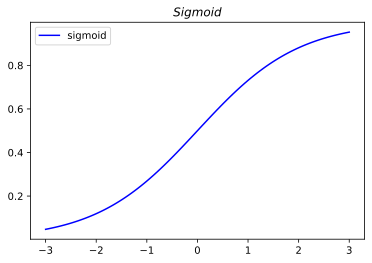

In [2]:
def sigmoid(x):
    return (1/(1 + np.exp(-x)))

x = np.linspace(-3,3,100)
y = [sigmoid(i) for i in x]
plt.plot(x,y,c='b',label = 'sigmoid')
plt.title('$Sigmoid$')
plt.legend()

In [3]:
a = torch.linspace(-100,100,10)

In [4]:
a

tensor([-100.0000,  -77.7778,  -55.5556,  -33.3333,  -11.1111,   11.1111,
          33.3333,   55.5556,   77.7778,  100.0000])

In [5]:
torch.sigmoid(a)

tensor([0.0000e+00, 1.6655e-34, 7.4564e-25, 3.3382e-15, 1.4945e-05, 9.9999e-01,
        1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00])

### $Tanh$

$f(x) = tanh(x) = \frac{e^x-e^{-x}}{e^x+e^{-x}}=2sigmoid(2x)-1$

### $Derivative$

$1-tanh^2(x)$

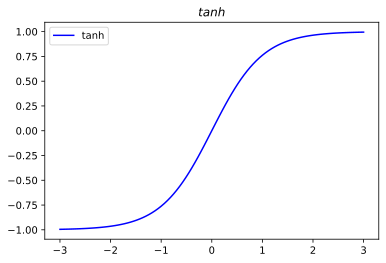

In [6]:
def tanh(x):
    return ((np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x)))

x = np.linspace(-3,3,100)
y = [tanh(i) for i in x]
plt.plot(x,y,c='b',label = 'tanh')
plt.title('$tanh$')
plt.legend()

In [7]:
a = torch.linspace(-1,1,10)

In [8]:
a

tensor([-1.0000, -0.7778, -0.5556, -0.3333, -0.1111,  0.1111,  0.3333,  0.5556,
         0.7778,  1.0000])

In [9]:
torch.tanh(a)

tensor([-0.7616, -0.6514, -0.5047, -0.3215, -0.1107,  0.1107,  0.3215,  0.5047,
         0.6514,  0.7616])

### $Relu$ 

$f(x)=relu(x)=max(0,x)$

### $Derivative$

$f^{'}(x)=0 \space x\lt0$

$f^{'}(x)=1 \space x\gt0$

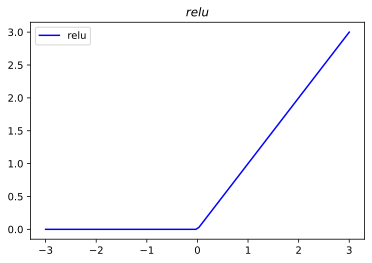

In [10]:
def relu(x):
    return max(x,0)

x = np.linspace(-3,3,100)
y = [relu(i) for i in x]
plt.plot(x,y,c='b',label = 'relu')
plt.title('$relu$')
plt.legend()

## $损失值$

- $Mean\space Squared\space Error$
- $Cross\space Entropy\space Loss$
    
   ▪ $binary$
    
   ▪ $multi-class$
    
   ▪ $softmax$

## $Gradient\space API$

- $torch.autograd.grad(loss,[w_1,w_2,...])$

- $loss.backward()$

### $MSE$

$loss = \sum{[y-(xw+b)]^2}$

In [11]:
x = torch.ones(1)
w = torch.full([1],2)
mse = F.mse_loss(x * w,torch.ones(1))

../aten/src/ATen/native/TensorFactories.cpp:361: UserWarning: Deprecation warning: In a future PyTorch release torch.full will no longer return tensors of floating dtype by default. Instead, a bool fill_value will return a tensor of torch.bool dtype, and an integral fill_value will return a tensor of torch.long dtype. Set the optional `dtype` or `out` arguments to suppress this warning.


In [12]:
mse

tensor(1.)

$Error$

```python
torch.autograd.grad(mse,[w])

---------------------------------------------------------------------------
RuntimeError                              Traceback (most recent call last)
<ipython-input-27-8ffc13237761> in <module>
----> 1 torch.autograd.grad(mse,[w])

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/torch/autograd/__init__.py in grad(outputs, inputs, grad_outputs, retain_graph, create_graph, only_inputs, allow_unused)
    156     return Variable._execution_engine.run_backward(
    157         outputs, grad_outputs, retain_graph, create_graph,
--> 158         inputs, allow_unused)
    159 
    160 

RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn


```

In [13]:
w.requires_grad_()

tensor([2.], requires_grad=True)

$Error$

```python
torch.autograd.grad(mse,[w])

---------------------------------------------------------------------------
RuntimeError                              Traceback (most recent call last)
<ipython-input-29-8ffc13237761> in <module>
----> 1 torch.autograd.grad(mse,[w])

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/torch/autograd/__init__.py in grad(outputs, inputs, grad_outputs, retain_graph, create_graph, only_inputs, allow_unused)
    156     return Variable._execution_engine.run_backward(
    157         outputs, grad_outputs, retain_graph, create_graph,
--> 158         inputs, allow_unused)
    159 
    160 

RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn
```

In [14]:
mse = F.mse_loss(x * w,torch.ones(1))

In [15]:
torch.autograd.grad(mse,[w])

(tensor([2.]),)

### $loss.backward$

In [16]:
x = torch.ones(1)
w = torch.full([1],2)
w.requires_grad_()
mse = F.mse_loss(x*w,torch.ones(1))

In [17]:
mse

tensor(1., grad_fn=<MseLossBackward>)

In [18]:
mse.backward()

In [19]:
w.grad

tensor([2.])

### $Softmax$

$S(y_i)=\frac{e^{y_i}}{\sum_{j}{e^{y_j}}}$

### $Derivative$

$\frac{\delta P_i}{\delta a_j}=p_i(1-p_j)\space$ $if\space i = j$

$\frac{\delta P_i}{\delta a_j} = -p_ip_j\space$$if\space i != j$

In [20]:
a = torch.rand(3)

In [21]:
a.requires_grad_()

tensor([0.2205, 0.0494, 0.5426], requires_grad=True)

In [22]:
p = F.softmax(a, dim = 0)

In [23]:
torch.autograd.grad(p[1],[a],retain_graph = True)

(tensor([-0.0811,  0.1931, -0.1120]),)

In [24]:
torch.autograd.grad(p[2],[a])

(tensor([-0.1329, -0.1120,  0.2448]),)